In [21]:
import cv2
import numpy as np

def fov(img):
    # Load the image
    #img = cv2.imread("./datasets/PROCESSED/TESTE/1/parte_3_1488.png")

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to the grayscale image
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Use the Canny edge detector to find edges in the blurred image
    edges = cv2.Canny(blurred, 0, 150)

    # Find contours in the edges image
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Create a black image with the same size as the input image
    mask = np.zeros_like(img)

    # Draw the largest contour on the mask image
    largest_contour = max(contours, key=cv2.contourArea)
    cv2.drawContours(mask, [largest_contour], -1, (255, 255, 255), -1)

    # Apply the mask to the input image
    result = cv2.bitwise_and(img, mask)

    return result

True

In [22]:
def show(image):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    plt.axis("off")
    # convert color from CV2 BGR back to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

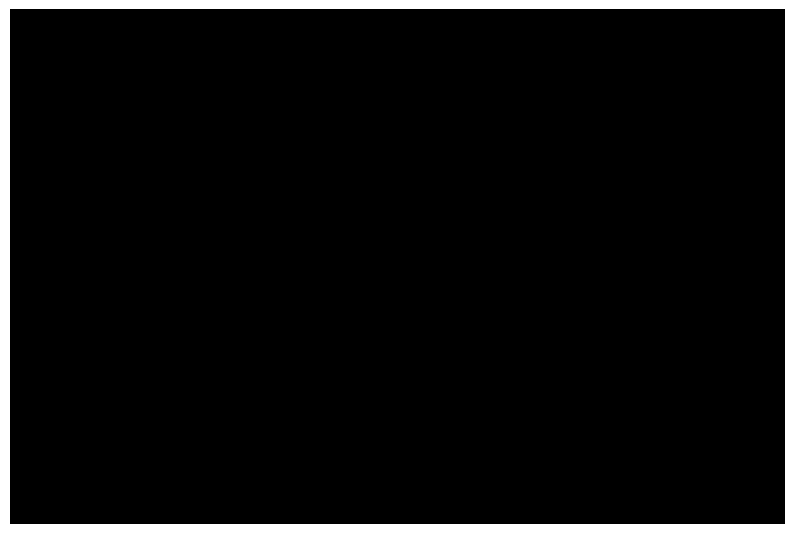

In [32]:
show(np.zeros_like(img))

In [40]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("./datasets/PROCESSED/TESTE/1/parte_3_1488.png")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find the contours in the thresholded image
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with all black pixels
mask = np.zeros_like(gray)

# Draw the largest contour on the mask
if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    cv2.drawContours(mask, [largest_contour], 0, 255, -1)

# Apply the mask to the grayscale image
masked_image = cv2.bitwise_and(gray, mask)

# Threshold the masked image to remove the black parts
_, threshold = cv2.threshold(masked_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Save the thresholded image
cv2.imwrite("output.png", threshold)


True

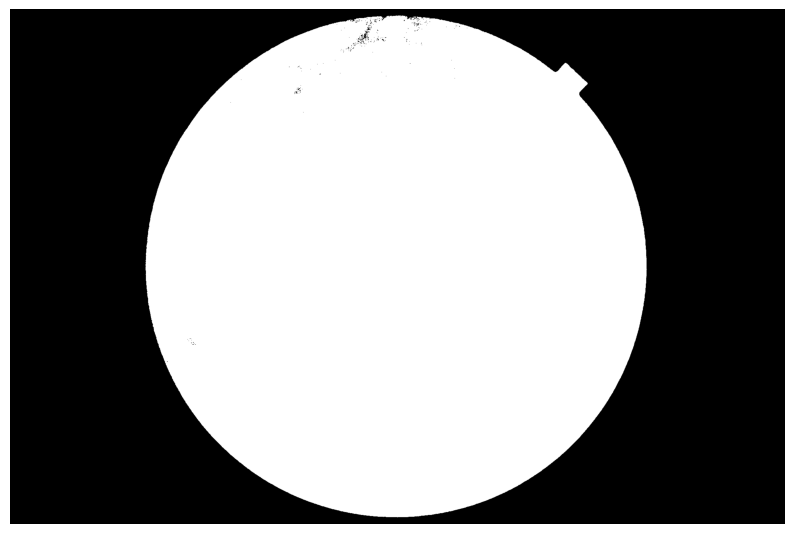

In [42]:
show(threshold)